# T-test

In [1]:
import numpy as np
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt

In [2]:
a = np.random.normal(0,1,1000)
b = np.random.normal(0,0.5,1000)
c = np.random.normal(0.1,1,1000)

In [3]:
print(a.mean())
print(b.mean())
print(c.mean())

-0.010454382967016595
-0.003513559049901122
0.08494838783591534


In [4]:
ttest_ind(a,b)

Ttest_indResult(statistic=-0.19717619348410984, pvalue=0.8437097152433868)

- a집단과 b집단은 통계적으로 비슷한 환경에서 생성 됐을 것이다.

In [5]:
ttest_ind(a,c)

Ttest_indResult(statistic=-2.15582710436493, pvalue=0.03121622339162003)

- a집단과 c집단은 생성 환경이 다를 가능성이 많다.

# 생일의 역설

- 한 방에 있는 사람 중 생일이 같은 사람이 적어도 두 명일 확률이 50%를 넘으려면 방에 최소 몇 명이 있어야할까?

## 무작위로 선택한 한 쌍(2 명)의 생일이 같지 않을 확률은 $\frac{364}{365}$

- 두 쌍(4 명)은 $(\frac{364}{365})^2$, 세 쌍(6 명)은 $(\frac{364}{365})^3$,<br/>일반화해서 n 쌍(2n 명): $(\frac{364}{365})^n$

In [6]:
for n in range(300):
  if ((364/365)**n < 0.5):
    print(n)
    break

253


- 253쌍을 비교하면 한 쌍은 생일이 같을 확률이 50%가 넘게 된다
- m개에서 k개를 선택하는 조합을 이용하여 사람 수를 구하면 된다

# $_mC_k=\frac{m!}{k!(m-k)!}$

# $\frac{23!}{2!(23-2)!}=\frac{23\times22}{2}=253$

코드로 시뮬레이션을 돌려보자!

In [7]:
match_list = []
for m in range(2,31):
  matches = 0
  for n in range(10000):
    match = 0
    b = np.random.randint(0,364,m)
    for i in range(m):
      for j in range(m):
        if (i != j) and (b[i] == b[j]):
          match += 1
    if (match != 0):
      matches += 1
  match_list.append(matches/10000)
  print(f"{m}명 중 생일이 같은 한 쌍이 있을 확률: {matches/10000}")

2명 중 생일이 같은 한 쌍이 있을 확률: 0.0038
3명 중 생일이 같은 한 쌍이 있을 확률: 0.0081
4명 중 생일이 같은 한 쌍이 있을 확률: 0.0166
5명 중 생일이 같은 한 쌍이 있을 확률: 0.0254
6명 중 생일이 같은 한 쌍이 있을 확률: 0.0387
7명 중 생일이 같은 한 쌍이 있을 확률: 0.0567
8명 중 생일이 같은 한 쌍이 있을 확률: 0.0767
9명 중 생일이 같은 한 쌍이 있을 확률: 0.0968
10명 중 생일이 같은 한 쌍이 있을 확률: 0.1226
11명 중 생일이 같은 한 쌍이 있을 확률: 0.1374
12명 중 생일이 같은 한 쌍이 있을 확률: 0.1616
13명 중 생일이 같은 한 쌍이 있을 확률: 0.199
14명 중 생일이 같은 한 쌍이 있을 확률: 0.2352
15명 중 생일이 같은 한 쌍이 있을 확률: 0.2586
16명 중 생일이 같은 한 쌍이 있을 확률: 0.2832
17명 중 생일이 같은 한 쌍이 있을 확률: 0.312
18명 중 생일이 같은 한 쌍이 있을 확률: 0.3437
19명 중 생일이 같은 한 쌍이 있을 확률: 0.3851
20명 중 생일이 같은 한 쌍이 있을 확률: 0.4095
21명 중 생일이 같은 한 쌍이 있을 확률: 0.4365
22명 중 생일이 같은 한 쌍이 있을 확률: 0.4769
23명 중 생일이 같은 한 쌍이 있을 확률: 0.5098
24명 중 생일이 같은 한 쌍이 있을 확률: 0.5428
25명 중 생일이 같은 한 쌍이 있을 확률: 0.5719
26명 중 생일이 같은 한 쌍이 있을 확률: 0.5985
27명 중 생일이 같은 한 쌍이 있을 확률: 0.6335
28명 중 생일이 같은 한 쌍이 있을 확률: 0.6511
29명 중 생일이 같은 한 쌍이 있을 확률: 0.674
30명 중 생일이 같은 한 쌍이 있을 확률: 0.7086


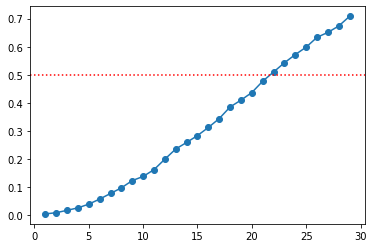

In [8]:
plt.plot(range(1,len(match_list)+1),match_list,marker='o')
plt.axhline(y=0.5,linestyle=':',color='red')

# 조건부 확률

- 사건 A가 사건 B에 영향을 미치게 되면 이땐 조건부 확률을 적용해야 된다.<br/>(예를 들면, 빨간/파란 구슬이 들어있는 주머니에서 구슬을 뽑고 넣지않고 뽑을 때)

## 조건부 확률을 연쇄법칙화 할 수 있는데 (미분의 Chain Rule 같은 것처럼) 일반형은

# $P(X_n, X_{n-1}..., X_1)=\overset{n}{\underset{i=1}{\Pi}}P(X_i|\overset{i-1}{\underset{j=1}{\cap}}X_j)$

## 쉽게 예를 들면 $P(X, Y, Z)=P(X|Y, Z)P(Y, Z)=P(X|Y, Z)P(Y|Z)P(Z)$인데<br/>Z가 발생할 확률, Z가 발생했을 때 Y가 발생할 확률, Y, Z가 발생했을 때 X가 발생할 확률을 곱한 것

예를 들어 50명의 사람이 참석한 곳에서 미국을 다녀온 사람이 4명이라고 가정할 때,<br/>무작위로 3명을 뽑았을 때 아무도 미국에 간 적이 없을 확률을 구하자

사람 한명을 뽑을 수록 다음 한명을 뽑을 때 전체 인원이 줄어들기 때문에 조건부 확률을 적용한다

코드로....!!

In [9]:
nb = 0
N = 100000
for i in range(N):
  s = np.random.randint(0,50,3)
  fail = False
  for t in range(3):
    if (s[t] < 4):
      fail = True
  if (not fail):
    nb += 1
print(f"확률은 {nb/N*100}%")

확률은 77.81%
